In [1]:
from cv2 import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
from matplotlib import image
import seaborn as sns
from scipy.fft import fft, ifft
from scipy.io.wavfile import read
from scipy.fftpack import fftfreq
from scipy.signal import stft
from numpy.linalg import norm

###### 1. Carregue um áudio (pode ser sua gravação ou baixada na internet).


In [2]:
Fs2, audio = read('beethoven.wav')
print(Fs2)
audio = audio[Fs2 * 10 : Fs2 * 20 + 1]

44100


###### 2. Gere e plote o espectro de potência gerado a partir do áudio carregado.

In [3]:
y2 = fft(audio)
y2 = y2[0 : int(len(audio) / 2)]

In [4]:
ep2 = np.abs(y2)**2

In [5]:
df2 = (Fs2) / len(ep2)
sfreqs3 = np.arange(0, Fs2, df2)

In [6]:
dB2 = 10 * np.log10(ep2)

Text(0, 0.5, 'Potência (dB)')

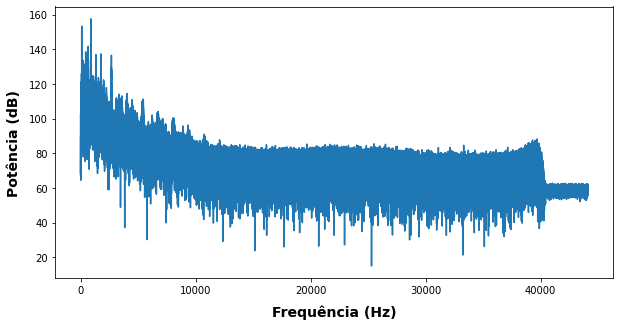

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(sfreqs3, dB2)
plt.xlabel("Frequência (Hz)", fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel("Potência (dB)", fontsize=14, fontweight='bold', verticalalignment='center', labelpad=15)

###### 3. Gere e plote o espectrograma gerado a partir do áudio carregado.

In [8]:
sfreqs2, time2, y2D2 = stft(audio, Fs2)

In [9]:
eg2 = np.abs(y2D2)**2

In [10]:
dB2D2 = 10 * np.log10(eg2)

Text(0.5, 0, 'Tempo (s)')

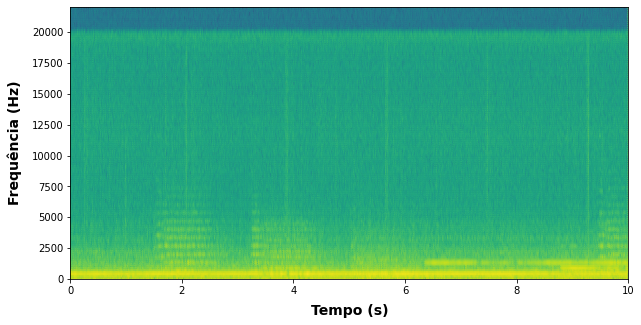

In [11]:
plt.figure(figsize=(10, 5))
plt.pcolormesh(time2, sfreqs2, dB2D2, shading='gouraud')
plt.ylabel("Frequência (Hz)", fontsize=14, fontweight='bold', labelpad=10)
plt.xlabel("Tempo (s)", fontsize=14, fontweight='bold', verticalalignment='center', labelpad=15)

###### 4. Aplique pelo menos dois filtro no áudio e exiba os espectros de potência resultantes.

In [12]:
fPB = y2.copy()
fPB[np.where(sfreqs3 > 100)] = 0
audioFPBc = ifft(fPB, n = len(fPB) * 2)
audioFPB = np.abs(audioFPBc)
y3 = fft(audioFPB)
y3 = y3[0 : int(len(audioFPB) / 2)]
ep3 = np.abs(y3)**2
df3 = (Fs2) / len(ep3)
sfreqs4 = np.arange(0, Fs2, df3)
dB3 = 10 * np.log10(ep3)

/tmp/ipykernel_91/4076866204.py:10: RuntimeWarning: divide by zero encountered in log10
  dB3 = 10 * np.log10(ep3)


Text(0, 0.5, 'Potência (dB)')

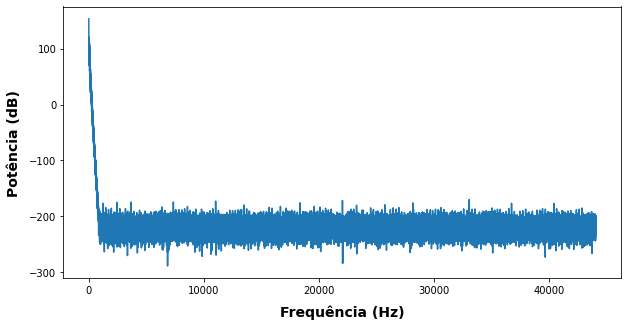

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(sfreqs4, dB3)
plt.xlabel("Frequência (Hz)", fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel("Potência (dB)", fontsize=14, fontweight='bold', verticalalignment='center', labelpad=15)

In [14]:
fPA = y2.copy()
fPA[np.where(sfreqs3 <= 35000)] = 0
audioFPAc = ifft(fPA, n = len(fPA) * 2)
audioFPA = np.abs(audioFPAc)
y4 = fft(audioFPA)
y4 = y4[0 : int(len(audioFPA) / 2)]
ep4 = np.abs(y4)**2
df4 = (Fs2) / len(ep4)
sfreqs5 = np.arange(0, Fs2, df4)
dB4 = 10 * np.log10(ep4)

Text(0, 0.5, 'Potência (dB)')

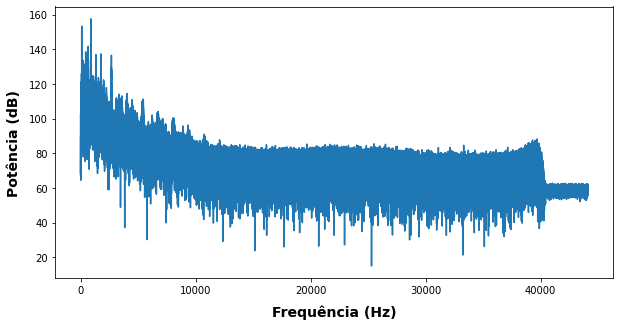

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(sfreqs4, dB2)
plt.xlabel("Frequência (Hz)", fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel("Potência (dB)", fontsize=14, fontweight='bold', verticalalignment='center', labelpad=15)

###### 5. Reconstrua o áudio resultante de cada filtro.

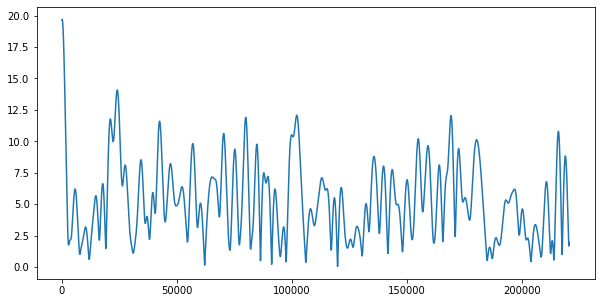

In [16]:
pba = y3.copy()
pba[np.where(sfreqs4 < 10)] = 0
pba[np.where(sfreqs4 > 50)] = 0
stFBAc = ifft(pba, n = len(pba) * 2)
stFBA = np.abs(stFBAc)[0:len(ep3)]
plt.figure(figsize=(10, 5))
plt.plot(stFBA)

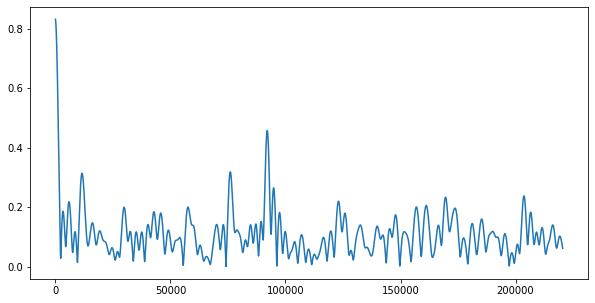

In [17]:
pba1 = y4.copy()
pba1[np.where(sfreqs5 < 10)] = 0
pba1[np.where(sfreqs5 > 50)] = 0
stFBAc1 = ifft(pba1, n = len(pba1) * 2)
stFBA1 = np.abs(stFBAc1)[0:len(ep4)]
plt.figure(figsize=(10, 5))
plt.plot(stFBA1)

###### 6. Mostre os resultados dos áudios reconstruídos utilizando Audio da biblioteca IPython.

In [18]:
display.Audio(stFBA, rate=Fs2)

In [19]:
display.Audio(stFBA1, rate=Fs2)